## used link: https://www.kaggle.com/code/akshayr009/india-weather/notebook

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [22]:
Bangalore=pd.read_csv('Bangalore_1990_2022_BangaloreCity.csv')
Chennai=pd.read_csv('Chennai_1990_2022_Madras.csv')
Delhi=pd.read_csv('Delhi_NCR_1990_2022_Safdarjung.csv')
Lucknow=pd.read_csv('Lucknow_1990_2022.csv')
Mumbai=pd.read_csv('Mumbai_1990_2022_Santacruz.csv')
Rajasthan=pd.read_csv('Rajasthan_1990_2022_Jodhpur.csv')
Bhubhneshwar=pd.read_csv('weather_Bhubhneshwar_1990_2022.csv')
Rourkela=pd.read_csv('weather_Rourkela_2021_2022.csv')

In [23]:
Bangalore['city-Name'] = 'Bangalore'
Chennai['city-Name'] = 'Chennai'
Delhi['city-Name'] = 'Delhi'
Lucknow['city-Name'] = 'Lucknow'
Mumbai['city-Name'] = 'Mumbai'
Rajasthan['city-Name'] = 'Rajasthan'
Bhubhneshwar['city-Name'] = 'Bhubhneshwar'
Rourkela['city-Name'] = 'Rourkela'

In [24]:
Bhubhneshwar

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city-Name
0,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
1,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
3,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Bhubhneshwar
...,...,...,...,...,...,...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN,Bhubhneshwar
11931,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN,Bhubhneshwar
11932,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN,Bhubhneshwar
11933,2022-09-03,29.2,26.1,34.0,9.7,NaN,215.0,8.5,NaN,1005.5,NaN,Bhubhneshwar


In [25]:
Bhubhneshwar.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)
Rourkela.drop(['snow','wdir','wpgt','pres','tsun','wspd'],axis=1,inplace=True)

In [26]:
Bhubhneshwar

,time,tavg,tmin,tmax,prcp,city-Name
0,1990-01-01,20.1,NaN,28.0,0.0,Bhubhneshwar
1,1990-01-02,20.7,16.4,NaN,0.0,Bhubhneshwar
2,1990-01-03,20.7,16.0,27.4,0.0,Bhubhneshwar
3,1990-01-04,18.8,NaN,28.0,0.0,Bhubhneshwar
4,1990-01-05,19.8,11.0,28.2,0.0,Bhubhneshwar
...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,Bhubhneshwar
11931,2022-09-01,29.6,27.0,33.0,2.1,Bhubhneshwar
11932,2022-09-02,29.7,26.3,33.0,3.3,Bhubhneshwar
11933,2022-09-03,29.2,26.1,34.0,9.7,Bhubhneshwar


In [28]:
def clean(df):
    df['prcp'].fillna(method="ffill",inplace=True)
    df['tmin'].fillna(method="ffill",inplace=True)
    df['tmax'].fillna(method="ffill",inplace=True)
    return df

In [29]:
Chennai=clean(Chennai)
Bangalore=clean(Bangalore)
Delhi=clean(Delhi)
Lucknow=clean(Lucknow)
Mumbai=clean(Mumbai)
Rajasthan=clean(Rajasthan)
Bhubhneshwar=clean(Bhubhneshwar)
Rourkela=clean(Rourkela)

In [30]:
Chennai['target']=Chennai.shift(-1)['tmax']
Bangalore['target']=Bangalore.shift(-1)['tmax']
Delhi['target']=Delhi.shift(-1)['tmax']
Lucknow['target']=Lucknow.shift(-1)['tmax']
Mumbai['target']=Mumbai.shift(-1)['tmax']
Rajasthan['target']=Rajasthan.shift(-1)['tmax']
Bhubhneshwar['target']=Bhubhneshwar.shift(-1)['tmax']
Rourkela['target']=Rourkela.shift(-1)['tmax']

In [31]:
Chennai.isnull().sum()

time          0
tavg         27
tmin          0
tmax          0
prcp          0
city-Name     0
target        1
dtype: int64

In [33]:
frames = [Chennai, Bangalore,Delhi,Lucknow,Mumbai,Rajasthan,Bhubhneshwar,Rourkela]
df = pd.concat(frames)

In [34]:
Rourkela

,time,tavg,tmin,tmax,prcp,city-Name,target
0,2021-07-06,29.3,26.2,32.6,NaN,Rourkela,33.4
1,2021-07-07,29.7,27.3,33.4,11.1,Rourkela,29.7
2,2021-07-08,27.4,25.8,29.7,66.9,Rourkela,32.1
3,2021-07-09,28.5,26.1,32.1,11.4,Rourkela,32.6
4,2021-07-10,29.0,26.2,32.6,2.7,Rourkela,33.7
...,...,...,...,...,...,...,...
421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela,33.2
422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela,33.7
423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela,32.6
424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela,31.8


In [35]:
df.shape

(83725, 7)

In [36]:
df.isnull().sum()

time           0
tavg         490
tmin           3
tmax           1
prcp           3
city-Name      0
target         8
dtype: int64

In [37]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            416, 417, 418, 419, 420, 421, 422, 423, 424, 425],
           dtype='int64', length=83725)

In [38]:
df.reset_index()

,index,time,tavg,tmin,tmax,prcp,city-Name,target
0,0,01-01-1990,25.2,22.8,28.4,0.5,Chennai,29.1
1,1,02-01-1990,24.9,21.7,29.1,0.0,Chennai,29.8
2,2,03-01-1990,25.6,21.4,29.8,0.0,Chennai,28.7
3,3,04-01-1990,25.7,21.4,28.7,0.0,Chennai,28.4
4,4,05-01-1990,25.5,20.7,28.4,0.0,Chennai,26.1
...,...,...,...,...,...,...,...,...
83720,421,2022-08-31,29.0,26.6,33.5,2.0,Rourkela,33.2
83721,422,2022-09-01,29.1,25.7,33.2,11.5,Rourkela,33.7
83722,423,2022-09-02,29.4,26.4,33.7,1.5,Rourkela,32.6
83723,424,2022-09-03,28.7,26.6,32.6,8.0,Rourkela,31.8


In [39]:
df['city-Name']=df['city-Name'].map({'Chennai': '0', 'Bangalore': '1','Delhi':'2','Lucknow':'3','Mumbai':'4','Rajasthan':'5','Bhubhneshwar':'6','Rourkela':'7'})

In [42]:
df.set_index('time',inplace=True)

In [43]:
df.sort_values(by='time')

,tavg,tmin,tmax,prcp,city-Name,target
time,,,,,,
01-01-1990,25.2,22.8,28.4,0.5,0,29.1
01-01-1990,7.2,NaN,18.1,0.0,3,17.2
01-01-1990,23.2,17.0,NaN,0.0,4,29.9
01-01-1990,22.9,19.1,28.4,NaN,1,26.5
01-01-1990,22.9,19.1,28.4,NaN,5,26.5
...,...,...,...,...,...,...
31-12-2021,20.3,17.6,26.5,0.0,5,24.6
31-12-2021,13.9,12.1,20.5,0.0,3,20.7
31-12-2021,10.9,4.6,18.2,0.0,2,20.0


In [44]:
df.index= pd.to_datetime(df.index)
df.dtypes

tavg         float64
tmin         float64
tmax         float64
prcp         float64
city-Name     object
target       float64
dtype: object

In [45]:
df['city-Name']=df['city-Name'].astype(str).astype(int) 

<AxesSubplot:xlabel='time'>

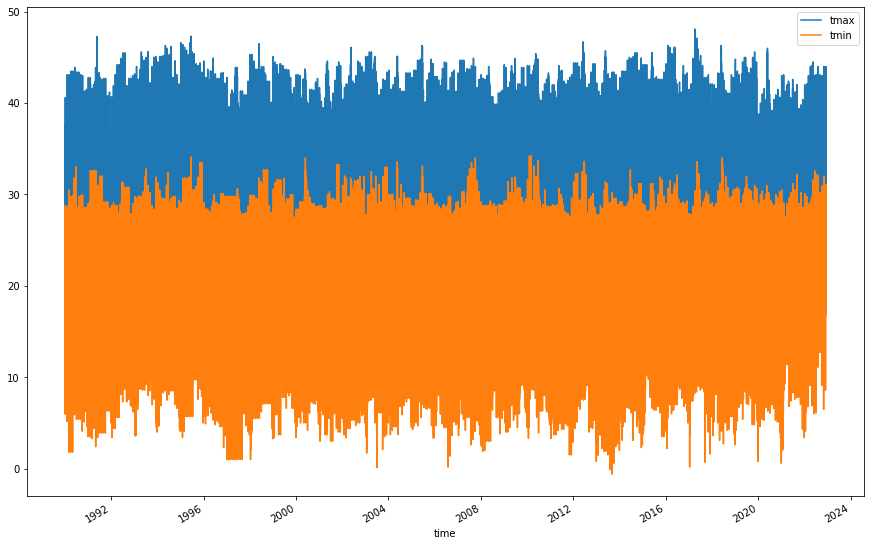

In [47]:
df[['tmax','tmin']].plot(figsize=(15,10))

<AxesSubplot:xlabel='time'>

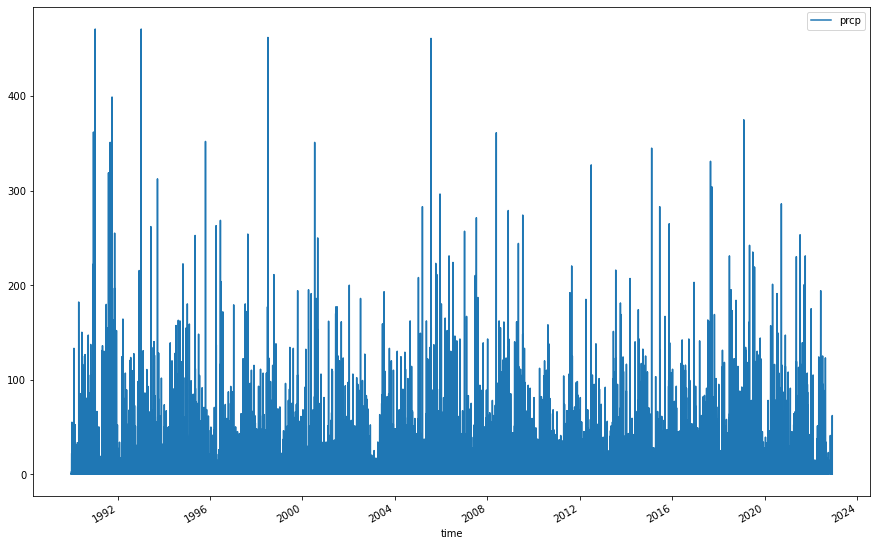

In [48]:
df[['prcp']].plot(figsize=(15,10))

<AxesSubplot:xlabel='time'>

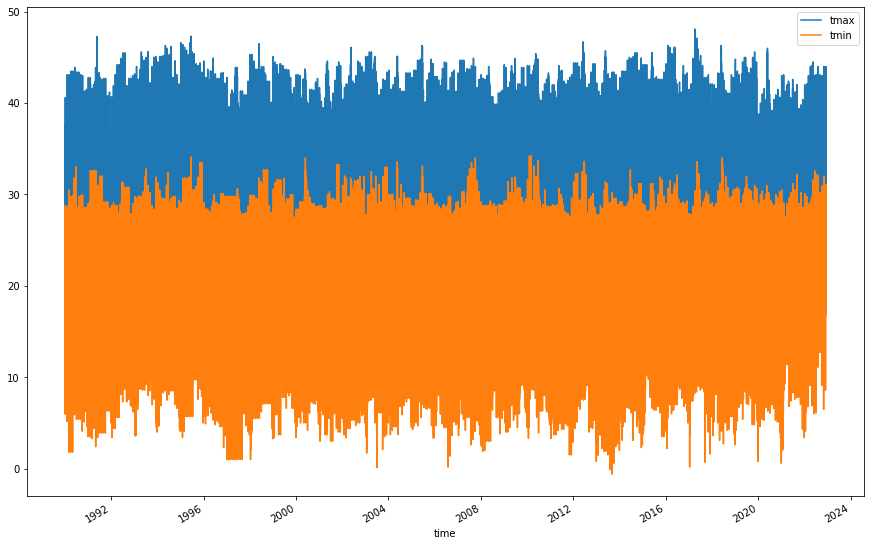

In [49]:
df[['tmax','tmin']].plot(figsize=(15,10))

In [50]:
df=df.iloc[:-1,:].copy()

In [51]:
df.drop(['tavg'],axis=1,inplace=True)

In [52]:
 df.dropna(inplace=True)

In [53]:
train=df.loc[:'2020-01-01']
test=df.loc['2020-01-01':]

In [54]:
train

,tmin,tmax,prcp,city-Name,target
time,,,,,
1990-01-01,22.8,28.4,0.5,0,29.1
1990-02-01,21.7,29.1,0.0,0,29.8
1990-03-01,21.4,29.8,0.0,0,28.7
1990-04-01,21.4,28.7,0.0,0,28.4
1990-05-01,20.7,28.4,0.0,0,26.1
...,...,...,...,...,...
2019-12-28,14.0,24.0,0.0,6,24.6
2019-12-29,10.2,24.6,0.0,6,24.0
2019-12-30,10.6,24.0,0.0,6,25.8


In [55]:
test

,tmin,tmax,prcp,city-Name,target
time,,,,,
2020-01-01,22.5,30.3,27.9,0,31.0
2020-02-01,23.4,31.0,33.0,0,31.2
2020-03-01,24.0,31.2,0.0,0,31.2
2020-04-01,24.5,31.2,0.0,0,31.6
2020-05-01,25.2,31.6,0.0,0,31.0
...,...,...,...,...,...
2022-08-30,26.4,34.3,0.0,7,33.5
2022-08-31,26.6,33.5,2.0,7,33.2
2022-09-01,25.7,33.2,11.5,7,33.7


## Train

In [56]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)
predictors = ["prcp", "tmax", "tmin","city-Name"]

In [57]:
train[predictors]

,prcp,tmax,tmin,city-Name
time,,,,
1990-01-01,0.5,28.4,22.8,0
1990-02-01,0.0,29.1,21.7,0
1990-03-01,0.0,29.8,21.4,0
1990-04-01,0.0,28.7,21.4,0
1990-05-01,0.0,28.4,20.7,0
...,...,...,...,...
2019-12-28,0.0,24.0,14.0,6
2019-12-29,0.0,24.6,10.2,6
2019-12-30,0.0,24.0,10.6,6


In [58]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [59]:
predictions = reg.predict(test[predictors])

In [60]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

2.1875836612703674

In [61]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
time,,
2020-01-01,31.0,30.585713
2020-02-01,31.2,31.271966
2020-03-01,31.2,31.400053
2020-04-01,31.6,31.421375
2020-05-01,31.0,31.814453
...,...,...
2022-08-30,33.5,34.295601
2022-08-31,33.2,33.582470
2022-09-01,33.7,33.294445


<AxesSubplot:xlabel='time'>

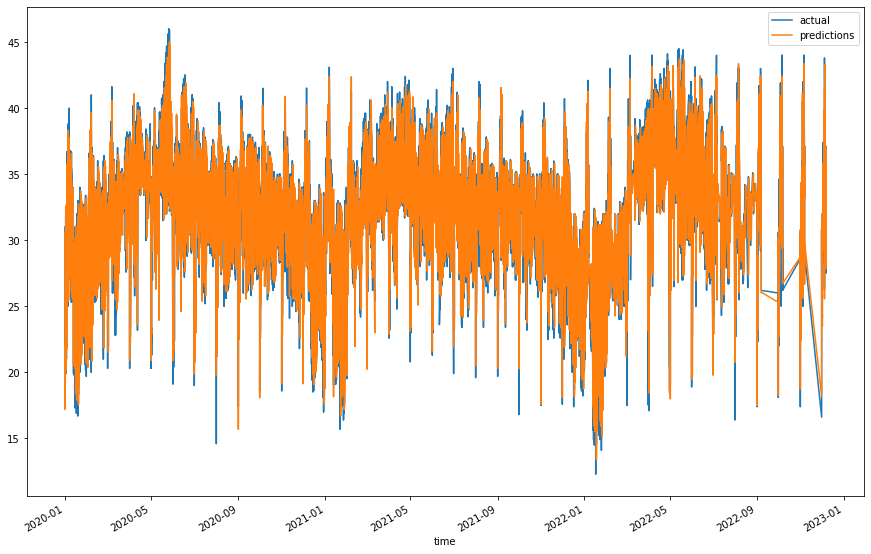

In [62]:
combined.plot(figsize=(15,10))

In [63]:
data = {
  "prcp": [0 , 0, 0, 0 ,0 ,0,0, 0.01,0,0,0,0,0],
  "tmax": [37,45,50,52,48,45,43,41,40,41,41,37,39],
    "tmin":[27,30,39,45,40,36,41,39,34,36,33,35,32],
    "city-Name":[0 , 1, 5, 0 ,0 ,4,1, 3,0,4,7,2,2]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
df

,prcp,tmax,tmin,city-Name
0,0.00,37,27,0
1,0.00,45,30,1
2,0.00,50,39,5
3,0.00,52,45,0
4,0.00,48,40,0
5,0.00,45,36,4
6,0.00,43,41,1
7,0.01,41,39,3
8,0.00,40,34,0
9,0.00,41,36,4


In [64]:
predictions1 = reg.predict(df)
predictions1

array([36.79477861, 44.18413799, 49.09580972, 51.18338543, 47.33789486,
       44.43065418, 42.83708344, 40.9294531 , 39.81748875, 40.7983824 ,
       40.66110476, 37.12969777, 38.81790238])

## Export pkl

In [66]:
import pickle

with open('IndiaWeatherModel_pkl', 'wb') as files:
    pickle.dump(reg, files)

In [67]:
with open('./IndiaWeatherModel_pkl' , 'rb') as f:
    lr = pickle.load(f) 

In [68]:
lr.predict(df)

array([36.79477861, 44.18413799, 49.09580972, 51.18338543, 47.33789486,
       44.43065418, 42.83708344, 40.9294531 , 39.81748875, 40.7983824 ,
       40.66110476, 37.12969777, 38.81790238])